Dataset downloaded successfully! an outdated `kagglehub` version (installed: 0.3.7), please consider upgrading to the latest version (0.3.11).


Decision Tree Accuracy: 0.8493
              precision    recall  f1-score   support

 Not Popular       0.92      0.91      0.92     30621
     Popular       0.29      0.32      0.31      3510

    accuracy                           0.85     34131
   macro avg       0.61      0.62      0.61     34131
weighted avg       0.86      0.85      0.85     34131



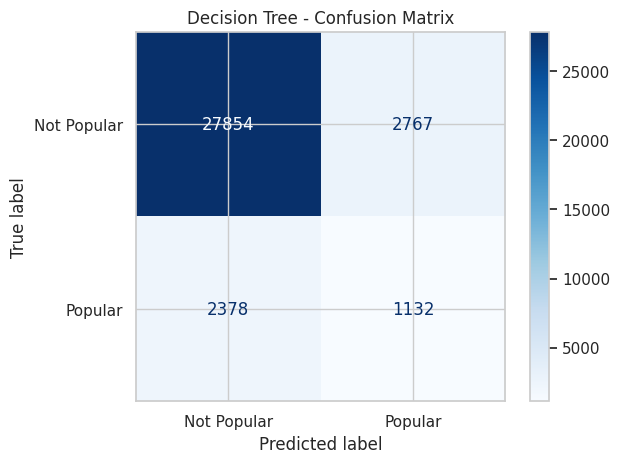


Random Forest Accuracy: 0.9045
              precision    recall  f1-score   support

 Not Popular       0.91      0.99      0.95     30621
     Popular       0.62      0.19      0.29      3510

    accuracy                           0.90     34131
   macro avg       0.77      0.59      0.62     34131
weighted avg       0.88      0.90      0.88     34131



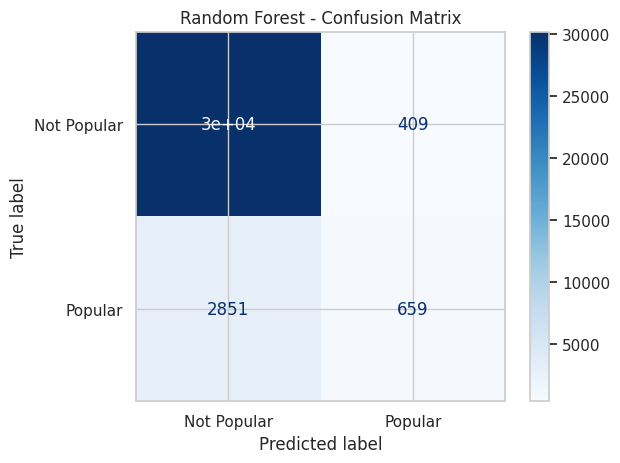


AdaBoost Accuracy: 0.8982
              precision    recall  f1-score   support

 Not Popular       0.90      1.00      0.95     30621
     Popular       0.55      0.05      0.09      3510

    accuracy                           0.90     34131
   macro avg       0.73      0.52      0.52     34131
weighted avg       0.87      0.90      0.86     34131



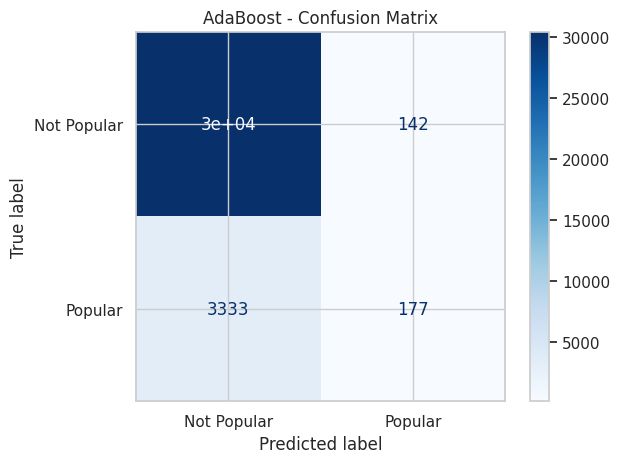


XGBoost Accuracy: 0.9062
              precision    recall  f1-score   support

 Not Popular       0.92      0.99      0.95     30621
     Popular       0.63      0.22      0.32      3510

    accuracy                           0.91     34131
   macro avg       0.77      0.60      0.64     34131
weighted avg       0.89      0.91      0.89     34131



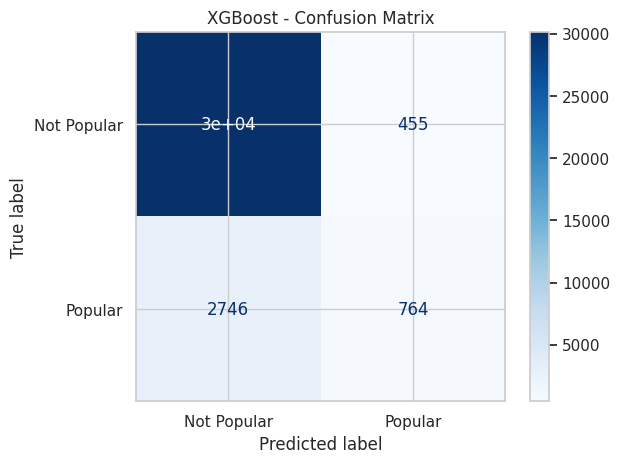

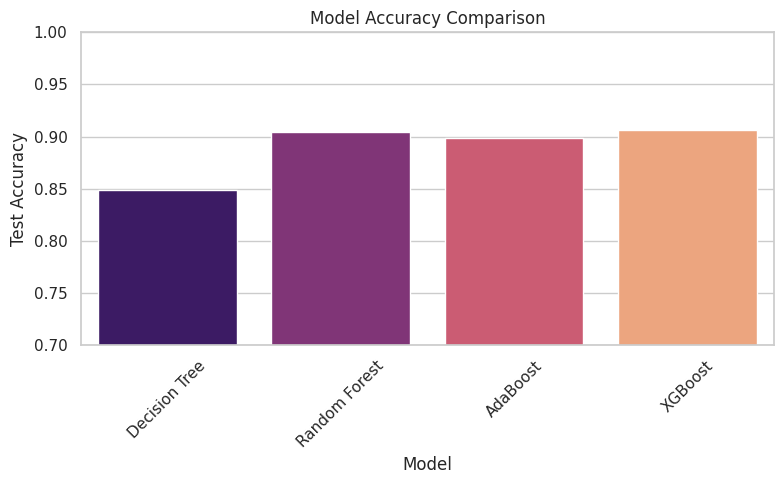

Concluding Remarks:
- Ensemble models generally outperform single decision trees due to reduced variance.
- Random Forest provides stability and robustness via bagging.
- AdaBoost and XGBoost boost weak learners, improving classification on hard cases.
- XGBoost often achieves the highest accuracy due to advanced regularization and optimization.
- Choice of ensemble depends on dataset complexity, size, and required interpretability.


In [1]:
# =============================================================================
# Lab 8: Ensembling and Boosting Algorithms
# =============================================================================

# Aim:
# To implement Random Forest, AdaBoost, and XGBoost classifiers to predict
# track popularity using the Spotify dataset and compare them with a base classifier.

# Objective:
# 1. Implement a base Decision Tree classifier.
# 2. Apply Random Forest (Bagging), AdaBoost, and XGBoost for ensemble learning.
# 3. Evaluate and compare model performances using classification metrics.

# =============================================================================
# Libraries
# =============================================================================

import os
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
)

# Ensure xgboost is installed
try:
    import xgboost as xgb
except ImportError:
    !pip install xgboost
    import xgboost as xgb

import kagglehub
import warnings
warnings.filterwarnings("ignore")
sns.set(style='whitegrid')
%matplotlib inline

# =============================================================================
# Data Loading and Preprocessing
# =============================================================================

def download_data():
    print("Downloading dataset...")
    path = kagglehub.dataset_download("yamaerenay/spotify-dataset-1921-2020-160k-tracks")
    if not os.path.exists('data.csv'):
        for root, dirs, files in os.walk(path):
            if 'data.csv' in files:
                shutil.copy2(os.path.join(root, 'data.csv'), 'data.csv')
                break
    if os.path.exists('data.csv'):
        print("Dataset downloaded successfully!")
        return pd.read_csv('data.csv')
    else:
        raise FileNotFoundError("data.csv not found after download.")

df = download_data()

features = [
    'acousticness', 'danceability', 'duration_ms', 'energy',
    'instrumentalness', 'liveness', 'loudness', 'mode',
    'speechiness', 'tempo', 'valence'
]
target = 'popularity'

df = df.dropna(subset=features + [target])
df['popularity_binary'] = (df[target] >= 60).astype(int)

X = df[features].values
y = df['popularity_binary'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =============================================================================
# Models
# =============================================================================

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))

    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=["Not Popular", "Popular"]))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Popular", "Popular"])
    disp.plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

# =============================================================================
# Comparison Plot
# =============================================================================

results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
plt.figure(figsize=(8,5))
sns.barplot(data=results_df, x='Model', y='Accuracy', palette='magma')
plt.title("Model Accuracy Comparison")
plt.ylabel("Test Accuracy")
plt.ylim(0.7, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# =============================================================================
# Concluding Remarks
# =============================================================================

print("Concluding Remarks:")
print("- Ensemble models generally outperform single decision trees due to reduced variance.")
print("- Random Forest provides stability and robustness via bagging.")
print("- AdaBoost and XGBoost boost weak learners, improving classification on hard cases.")
print("- XGBoost often achieves the highest accuracy due to advanced regularization and optimization.")
print("- Choice of ensemble depends on dataset complexity, size, and required interpretability.")
